In [6]:
import os
import numpy as np
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import matplotlib.pyplot as plt

In [2]:
fname='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/kay_images.npz'
with np.load(fname) as dobj:
    dat = dict(**dobj)

In [3]:
print(dat['responses'].shape)

(1750, 8428)


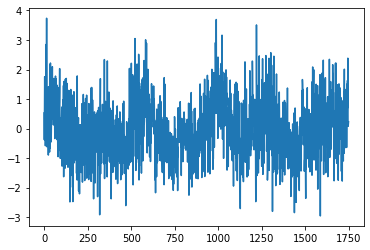

In [4]:
plt.plot(dat['responses'][:,0])

In [21]:
ep=EnsemblePursuit(lam=0.01,n_components=100,n_kmeans=100)
ep.fit(dat['responses'])

obtained 100 PCs in 2.5815 seconds
initialized 100 clusters with k-means in 1.3853 seconds
ensemble 0, time 0.34, nr neurons 302, EV 0.0040
ensemble 25, time 8.24, nr neurons 243, EV 0.0239
ensemble 50, time 15.19, nr neurons 126, EV 0.0392
ensemble 75, time 22.43, nr neurons 153, EV 0.0529
ensemble 99, time 28.72, nr neurons 55, EV 0.0638
average sparsity is 0.0211


In [11]:
V=ep.components_
print(V.shape)
U=ep.weights
print(U.shape)

(1750, 100)
(8428, 100)


In [25]:
ensemble=np.nonzero(U[:,99])[0]

In [18]:
print(ensemble)

[  10  519  526 ... 8372 8373 8400]


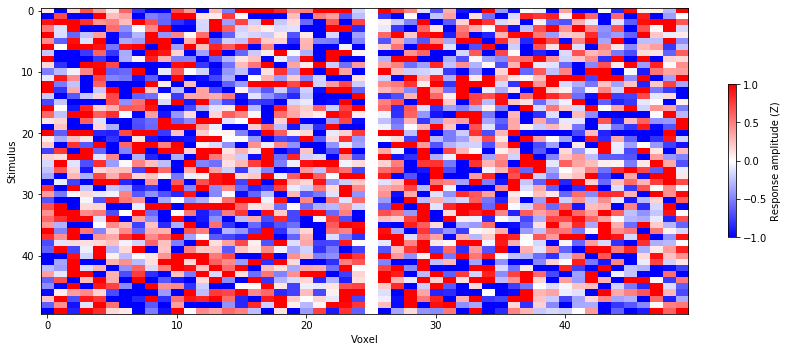

In [30]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="Stimulus")
heatmap = ax.imshow(dat["responses"][:50,ensemble[:50]], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

In [28]:
dat['roi']

array([3, 3, 3, ..., 3, 3, 6])

In [35]:
names_dct={}

for j in range(0,dat['roi_names'].shape[0]):
    names_dct[j]=dat['roi_names'][j]

In [ ]:
print(dat[])

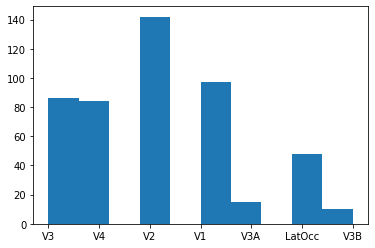

In [78]:
def which_regions(dat,U,ensemble_ind):
    reg_lst=[]
    names=list(dat['roi_names'])
    ensemble=np.nonzero(U[:,ensemble_ind])[0]
    dct={}
    for i in range(0,len(names)):
        dct[i]=names[i]
    for d in range(dat['roi'][ensemble].shape[0]):
        #print(d)
        #dat['roi'][ensemble]
        ind=dat['roi'][ensemble][d]
        indx=names.index(dct[ind])
        label=names[indx]
        reg_lst.append(label)
    #print(reg_lst)
    plt.hist(reg_lst)
which_regions(dat,U,19)

In [52]:
print(dat['roi_names'])

['Other' 'V1' 'V2' 'V3' 'V3A' 'V3B' 'V4' 'LatOcc']


In [55]:
which_regions(dat,U,50)

In [33]:
print(ens)

[ 0 57 91 96 22 23 45 24]


In [31]:
from sklearn.decomposition import PCA

pcs=PCA(n_components=100)

